In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Primera Parte

In [3]:
df=pd.read_csv('dengue.csv', usecols=[1,3,5,7,10,12])
df= np.array(df.dropna())

In [54]:
nclusters=np.arange(2,10)
scores_dengue1=[]
scores_dengue2=[]
for i in range(len(nclusters)):
    kmeans = KMeans(n_clusters=nclusters[i], random_state=0)
    kmeans.fit(df)
    scores_dengue1.append(metrics.silhouette_score(df, kmeans.labels_, metric='euclidean'))
    scores_dengue2.append(metrics.davies_bouldin_score(df, kmeans.labels_)  )

/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divid

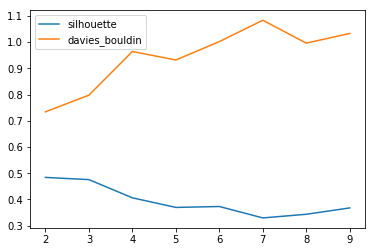

In [55]:
plt.plot(nclusters,scores_dengue1,label='silhouette')
plt.plot(nclusters,scores_dengue2,label='davies_bouldin')
plt.legend()


In [56]:
ii=np.argmin(scores_dengue2)
nclusters[ii]

2

In [57]:
ii=np.argmax(scores_dengue1)
nclusters[ii]

2

## Segunda Parte

In [119]:
df=pd.read_csv('BreadBasket_DMS.csv')
df=np.array(df.dropna())
np.shape(df)

(21293, 4)

In [120]:
df

array([['2016-10-30', '09:58:11', 1, 'Bread'],
       ['2016-10-30', '10:05:34', 2, 'Scandinavian'],
       ['2016-10-30', '10:05:34', 2, 'Scandinavian'],
       ...,
       ['2017-04-09', '14:57:06', 9683, 'Coffee'],
       ['2017-04-09', '14:57:06', 9683, 'Pastry'],
       ['2017-04-09', '15:04:24', 9684, 'Smoothies']], dtype=object)

In [67]:
df_train, df_test=train_test_split(df, test_size=0.33, random_state=42)

In [68]:
a = df_train[:,0]
u, indices = np.unique(a, return_inverse=True)
a=indices
b = df_train[:,1]
u, indices = np.unique(b, return_inverse=True)
b=indices
c = df_train[:,2]
u, indices = np.unique(c, return_inverse=True)
c=indices
d = df_train[:,3]
u, indices = np.unique(d, return_inverse=True)
d=indices

In [69]:
df=np.array([a,b,c,d]).T

In [70]:
nclusters=np.arange(2,60)
scores_baker1=[]
scores_baker2=[]
scores_baker3=[]
for i in range(len(nclusters)):
    kmeans = KMeans(n_clusters=nclusters[i], random_state=0)
    kmeans.fit(df)
    scores_baker1.append(metrics.silhouette_score(df, kmeans.labels_, metric='euclidean'))
    scores_baker2.append(metrics.davies_bouldin_score(df, kmeans.labels_)  )
    scores_baker3.append(metrics.calinski_harabaz_score(df,kmeans.labels_))

/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divid

/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divid

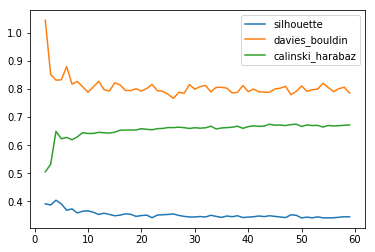

In [72]:
plt.plot(nclusters,scores_baker1,label='silhouette')
plt.plot(nclusters,scores_baker2,label='davies_bouldin')
plt.plot(nclusters,np.array(scores_baker3)/22000,label='calinski_harabaz')
plt.legend()

In [73]:
ii=np.argmin(scores_baker2)
nclusters[ii]

26

In [74]:
ii=np.argmax(scores_baker1)
nclusters[ii]

4

In [75]:
ii=np.argmax(scores_baker3)
nclusters[ii]

49

In [76]:
a = df_test[:,0]
u, indices = np.unique(a, return_inverse=True)
a=indices
b = df_test[:,1]
u, indices = np.unique(b, return_inverse=True)
b=indices
c = df_test[:,2]
u, indices = np.unique(c, return_inverse=True)
c=indices
d = df_test[:,3]
u, indices = np.unique(d, return_inverse=True)
d=indices

In [77]:
df=np.array([a,b,c,d]).T

In [78]:
nclusters=np.arange(2,60)
scores_baker1=[]
scores_baker2=[]
scores_baker3=[]
for i in range(len(nclusters)):
    kmeans = KMeans(n_clusters=nclusters[i], random_state=0)
    kmeans.fit(df)
    scores_baker1.append(metrics.silhouette_score(df, kmeans.labels_, metric='euclidean'))
    scores_baker2.append(metrics.davies_bouldin_score(df, kmeans.labels_)  )
    scores_baker3.append(metrics.calinski_harabaz_score(df,kmeans.labels_))

/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divid

/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divid

In [79]:
ii=np.argmin(scores_baker2)
nclusters[ii]

35

In [80]:
ii=np.argmax(scores_baker1)
nclusters[ii]

4

In [81]:
ii=np.argmax(scores_baker3)
nclusters[ii]

57

Decido que lo 'optimo son 4 clusters

In [5]:
df=pd.read_csv('BreadBasket_DMS.csv')
df=np.array(df.dropna())
a = df[:,0]
u, indices = np.unique(a, return_inverse=True)
a=indices
b = df[:,1]
u, indices = np.unique(b, return_inverse=True)
b=indices
c = df[:,2]
u, indices = np.unique(c, return_inverse=True)
c=indices
d = df[:,3]
u, indices = np.unique(d, return_inverse=True)
d=indices
df=np.array([a,b,c,d]).T

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [7]:
index=kmeans. fit_predict(df)
index

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [8]:
index_cluster0=[i for i, e in enumerate(index) if e == 0]
index_cluster1=[i for i, e in enumerate(index) if e == 1]
index_cluster2=[i for i, e in enumerate(index) if e == 2]
index_cluster3=[i for i, e in enumerate(index) if e == 3]

In [9]:
df=pd.read_csv('BreadBasket_DMS.csv')
df=np.array(df.dropna())
np.shape(df)

(21293, 4)

In [10]:
cluster0_0=[]
cluster0_1=[]
cluster0_2=[]
cluster0_3=[]
for i in index_cluster0:
    cluster0_0.append(df[i,0])
    cluster0_1.append(df[i,1])
    cluster0_2.append(df[i,2])
    cluster0_3.append(df[i,3])
    
cluster1_0=[]
cluster1_1=[]
cluster1_2=[]
cluster1_3=[]
for i in index_cluster1:
    cluster1_0.append(df[i,0])
    cluster1_1.append(df[i,1])
    cluster1_2.append(df[i,2])
    cluster1_3.append(df[i,3])
    
cluster2_0=[]
cluster2_1=[]
cluster2_2=[]
cluster2_3=[]
for i in index_cluster2:
    cluster2_0.append(df[i,0])
    cluster2_1.append(df[i,1])
    cluster2_2.append(df[i,2])
    cluster2_3.append(df[i,3])
    
cluster3_0=[]
cluster3_1=[]
cluster3_2=[]
cluster3_3=[]
for i in index_cluster3:
    cluster3_0.append(df[i,0])
    cluster3_1.append(df[i,1])
    cluster3_2.append(df[i,2])
    cluster3_3.append(df[i,3])

In [11]:
cluster0=np.array([cluster0_0,cluster0_1,cluster0_2,cluster0_3])
cluster1=np.array([cluster1_0,cluster1_1,cluster1_2,cluster1_3])
cluster2=np.array([cluster2_0,cluster2_1,cluster2_2,cluster2_3])
cluster3=np.array([cluster3_0,cluster3_1,cluster3_2,cluster3_3])

In [12]:
cluster0[0]

array(['2017-01-18', '2017-01-18', '2017-01-18', ..., '2017-04-09',
       '2017-04-09', '2017-04-09'], dtype='<U29')

In [ ]:
plt.hist(cluster0[0], bins='auto')
plt.hist(cluster0[1], bins='auto') 
plt.hist(cluster0[2], bins='auto') 
plt.hist(cluster0[3], bins='auto')

(array([ 643.,    5.,  171., 1264.,  779.,   38.,   63.,  552.,   72.,
         470.,   41.,  131.,  120.,  102.,   36.,   94.,  138.,   86.,
          66.,   23.,   24.,   26.,  201.,  166.,    3.,  116.,   17.,
          52.,   27.,   52.,    7.,   10.,   34.,   10.,    3.,    9.,
           7.,    6.,    5.,    4.,    3.,   11.]),
 array([4491.        , 4492.42857143, 4493.85714286, 4495.28571429,
        4496.71428571, 4498.14285714, 4499.57142857, 4501.        ,
        4502.42857143, 4503.85714286, 4505.28571429, 4506.71428571,
        4508.14285714, 4509.57142857, 4511.        , 4512.42857143,
        4513.85714286, 4515.28571429, 4516.71428571, 4518.14285714,
        4519.57142857, 4521.        , 4522.42857143, 4523.85714286,
        4525.28571429, 4526.71428571, 4528.14285714, 4529.57142857,
        4531.        , 4532.42857143, 4533.85714286, 4535.28571429,
        4536.71428571, 4538.14285714, 4539.57142857, 4541.        ,
        4542.42857143, 4543.85714286, 4545.28571429,

In [ ]:
plt.hist(cluster1[0], bins='auto') 
plt.hist(cluster1[1], bins='auto') 
plt.hist(cluster1[2], bins='auto') 
plt.hist(cluster1[3], bins='auto') 

In [ ]:
plt.hist(cluster2[0], bins='auto') 
plt.hist(cluster2[1], bins='auto') 
plt.hist(cluster2[2], bins='auto') 
plt.hist(cluster2[3], bins='auto') 

In [ ]:
plt.hist(cluster3[0], bins='auto') 
plt.hist(cluster3[1], bins='auto') 
plt.hist(cluster3[2], bins='auto') 
plt.hist(cluster3[3], bins='auto') 

In [22]:
cluster1[0]
a = cluster1[0]
u, indices = np.unique(a, return_inverse=True)
a=indices
b = cluster1[1]
u, indices = np.unique(b, return_inverse=True)
b=indices
c = cluster1[2]
u, indices = np.unique(c, return_inverse=True)
c=indices
d = cluster1[3]
u, indices = np.unique(d, return_inverse=True)
d=indices

In [23]:
d = {'col1': a, 'col2': b,'col3':c,'col4':d}
df = pd.DataFrame(data=d)

In [24]:
scaled_data = StandardScaler().fit(df).transform(df)
pca = PCA(n_components = 2).fit(scaled_data)
x_pca = pca.transform(scaled_data)
components = pd.DataFrame(pca.components_.T, index=df.columns, columns=['PCA1','PCA2'])

/home/beatrizo/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/beatrizo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


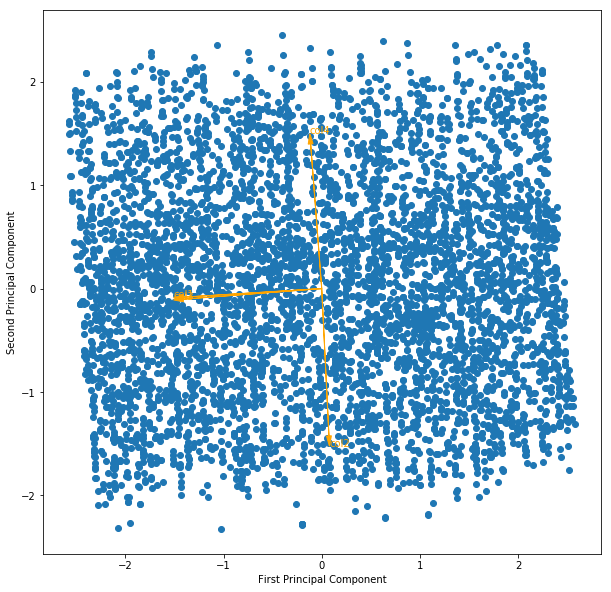

In [25]:
offset = 1.07
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
for i in range(len(np.arange(0,4))):
    ax.arrow(0, 0, 2*components['PCA1'][i], 2*components['PCA2'][i],color='orange',head_width=0.05, head_length=0.1)
    ax.annotate(components.index[i], (2*components['PCA1'][i]*offset, 2*components['PCA2'][i]*offset), color='orange')
